In [1]:
import json
import pandas as pd

In [2]:
with open('./data/sns_moscow/result.json', 'r', encoding='utf-8') as f:
    raw = json.load(f)

In [3]:
raw['name'], raw['type'], raw['id']

('SNS: Moscow', 'public_supergroup', 1125121377)

In [4]:
mess = raw['messages']
print(len(mess))

31084


In [5]:
mess[-1]

{'id': 35251,
 'type': 'message',
 'date': '2021-05-30T17:22:38',
 'edited': '2021-05-30T17:22:59',
 'from': 'עובד שעות נוספות',
 'from_id': 'user1382812860',
 'reply_to_message_id': 35250,
 'text': 'там была рефералка на бинанс, но видимо уже удалили'}

In [6]:
df = pd.DataFrame([m for m in mess if m.get('text')]).set_index('id')
df.shape

(29074, 19)

In [7]:
df.columns

Index(['type', 'date', 'edited', 'from', 'from_id', 'text',
       'reply_to_message_id', 'forwarded_from', 'photo', 'width', 'height',
       'via_bot', 'file', 'thumbnail', 'mime_type', 'media_type', 'performer',
       'title', 'duration_seconds'],
      dtype='object')

In [8]:
print(df.reply_to_message_id.notnull().mean())

0.46305977849625096


In [44]:
df.sample(3)

type                 date edited                       from  \
id                                                                      
10337  message  2019-05-28T10:37:58    NaN  Lumi סמרה ᅠᅠᅠᅠᅠᅠᅠ𓆏ᅠᅠᅠᅠᅠᅠᅠ   
1312   message  2018-02-15T23:22:22    NaN                Constantine   
18392  message  2020-01-22T00:26:10    NaN                 Ilya Zykov   

             from_id                                               text  \
id                                                                        
10337  user288563563  Я умудрялась так делать в Твоём Доме в Мякинин...   
1312   user133239098                                         напиши ему   
18392   user94540484                                                  +   

       reply_to_message_id forwarded_from photo  width  height via_bot file  \
id                                                                            
10337              10334.0            NaN   NaN    NaN     NaN     NaN  NaN   
1312                   NaN            NaN   NaN    NaN     NaN     NaN  NaN   
18392              18390.0            NaN   NaN    NaN     NaN     NaN  NaN   

      thumbnail mime_type media_type performer title  duration_seconds  
id                                                                      
10337       NaN       NaN        NaN       NaN   NaN               NaN  
1312        NaN       NaN        NaN       NaN   NaN               NaN  
18392       NaN       NaN        NaN       NaN   NaN               NaN

In [46]:
df[df.thumbnail.notnull()].T

id                                                               6089   \
type                                                           message   
date                                               2018-12-06T00:36:04   
edited                                                             NaN   
from                                                       obuch metod   
from_id                                                  user461537064   
text                                                          Человек.   
reply_to_message_id                                                NaN   
forwarded_from                                                     NaN   
photo                                                              NaN   
width                                                              359   
height                                                             480   
via_bot                                                            NaN   
file                 (File not included. Change data exporting sett...   
thumbnail            (File not included. Change data exporting sett...   
mime_type                                                    image/png   
media_type                                                         NaN   
performer                                                          NaN   
title                                                              NaN   
duration_seconds                                                   NaN   

id                                                               6333   \
type                                                           message   
date                                               2018-12-10T18:36:53   
edited                                                             NaN   
from                                                       obuch metod   
from_id                                                  user461537064   
text                                         На каких языках написано?   
reply_to_message_id                                               6326   
forwarded_from                                                     NaN   
photo                                                              NaN   
width                                                             1024   
height                                                             683   
via_bot                                                            NaN   
file                 (File not included. Change data exporting sett...   
thumbnail            (File not included. Change data exporting sett...   
mime_type                                                    image/png   
media_type                                                         NaN   
performer                                                          NaN   
title                                                              NaN   
duration_seconds                                                   NaN   

id                                                               17272  \
type                                                           message   
date                                               2019-12-19T18:54:50   
edited                                                             NaN   
from                                             Anastasia Gaydashenko   
from_id                                                  user175307798   
text                 ["Стой! Стой, я сказал!"\n\nОчень страшное вид...   
reply_to_message_id                                                NaN   
forwarded_from                                               LIFE SHOT   
photo                                                              NaN   
width                                                             1080   
height                                                            1080   
via_bot                                                            NaN   
file                 (File not included. Change data exporting sett...   
th

Изучаем ответы

In [9]:
df['time'] = pd.to_datetime(df.date)

In [10]:
idx = set(df.index)

In [11]:
replies = df[df.reply_to_message_id.notnull() & df.reply_to_message_id.apply(lambda i: i in idx)].copy()
replies.shape

(13044, 20)

In [12]:
replies['diff_id'] = replies.index - replies.reply_to_message_id

In [13]:
replies['diff_time'] = (replies.time - df.loc[replies.reply_to_message_id.astype(int)].time.values).dt.total_seconds() / 3600

In [14]:
replies['diff_id'].describe()

count    13044.000000
mean        11.668583
std        179.278791
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max      15627.000000
Name: diff_id, dtype: float64

In [15]:
replies['diff_id'].quantile([0.5, 0.75, 0.9, 0.95, 0.99, 0.999])

0.500       2.000
0.750       5.000
0.900      14.000
0.950      26.000
0.990      90.570
0.999    1110.882
Name: diff_id, dtype: float64

In [16]:
replies['diff_time'].quantile([0.5, 0.75, 0.9, 0.95, 0.99, 0.999])

0.500      0.060833
0.750      0.417708
0.900      2.819083
0.950      9.755889
0.990     52.919061
0.999    734.356643
Name: diff_time, dtype: float64

In [17]:
(replies['diff_time'] < 1).mean()

0.827046918123275

In [18]:
(replies['diff_id'] < 100).mean()

0.9906470407850353

Вывод: если брать окно в 100 сообщений, его хватит за глаза для выбора всех ответов. 

In [19]:
import matplotlib.pyplot as plt

In [20]:
tail = df.tail(1000).copy()

In [85]:
tail.date.min(), tail.date.max()

('2021-04-27T18:58:12', '2021-05-30T17:22:38')

In [78]:
tail.head(30)

type                 date               edited               from  \
id                                                                            
34019  message  2021-04-27T18:58:12                  NaN             Iván 🍵   
34020  message  2021-04-27T18:58:25                  NaN      Кирилл Чуркин   
34021  message  2021-04-27T18:58:58                  NaN      Dmitrii Dyago   
34022  message  2021-04-27T19:00:23                  NaN             Danya🔥   
34023  message  2021-04-27T19:00:57                  NaN             Danya🔥   
34024  message  2021-04-27T19:01:11                  NaN    Тимофей Смирнов   
34025  message  2021-04-27T19:01:23                  NaN           Larisa M   
34026  message  2021-04-27T19:01:23                  NaN  Nikolay Tkachenko   
34027  message  2021-04-27T19:01:24                  NaN  Александр Краснов   
34028  message  2021-04-27T19:01:36                  NaN             Iván 🍵   
34029  message  2021-04-27T19:02:21                  NaN      Кирилл Чуркин   
34030  message  2021-04-27T19:02:32                  NaN             Danya🔥   
34031  message  2021-04-27T19:03:13  2021-04-27T19:03:24             Danya🔥   
34032  message  2021-04-27T19:03:16                  NaN  Nikolay Tkachenko   
34033  message  2021-04-27T19:03:26  2021-04-27T19:03:49           Larisa M   
34034  message  2021-04-27T19:03:38                  NaN           Larisa M   
34035  message  2021-04-27T19:03:53                  NaN             Danya🔥   
34036  message  2021-04-27T19:04:32                  NaN           Larisa M   
34037  message  2021-04-27T19:07:35  2021-04-27T19:07:39  Nikolay Tkachenko   
34038  message  2021-04-27T19:08:49                  NaN             Danya🔥   
34039  message  2021-04-27T19:08:49                  NaN  Nikolay Tkachenko   
34040  message  2021-04-27T19:08:58                  NaN  Александр Краснов   
34041  message  2021-04-27T19:09:06                  NaN  Александр Краснов   
34042  message  2021-04-27T19:10:06                  NaN           Larisa M   
34043  message  2021-04-27T19:10:18                  NaN             Iván 🍵   
34044  message  2021-04-27T19:10:34                  NaN  Nikolay Tkachenko   
34045  message  2021-04-27T19:10:57                  NaN           Larisa M   
34046  message  2021-04-27T19:11:01                  NaN  Александр Краснов   
34047  message  2021-04-27T19:11:02                  NaN  Nikolay Tkachenko   
34048  message  2021-04-27T19:11:14                  NaN             Danya🔥   

             from_id                                               text  \
id                                                                        
34019  user256581511      Это там где за такси начисляют и снимают 10%?   
34020  user169372988                       Разверни мысль, я не в курсе   
34021  user108263676  в том то и дело, что сервиса три с половиной, ...   
34022  user227422387  Тем что они лучше?)\nКарты для России лучше гу...   
34023  user227422387  Рекомендации Яндекс.Музыки нравятся больше Спо...   
34024  user444172597             Точно, карты с навигатором забыли ещё)   
34025  user110806063  Мое личное ощущение что рекомендации Яндекс Му...   
34026  user257814622                                             Угу, +   
34027  user138164087                 Нет караоке мода - все идут лесом)   
34028  user256581511  [{'type': 'link', 'text': 'https://vc.ru/servi...   
34029  user169372988  Меня смущает, что некоторые говорят что Яндекс...   
34030  user227422387  На КиноПоиске больше фильмов/сериалов, которые...   
34031  user227422387  Начал тоже схожее замечать\nНо я связал это с ...   
34032  user257814622  На всякий случай, у кинопоиска одна из самых м...   
34033  user110806063  Ну вообще продукты у них нормальные. Можете по...   
34034  user110806063                            я никуда не переезжала)   
34035  user227422387  Я про личный опыт\nТо, что меня интересует, та...   
34036  user110806063  А вот про то насколько лучше работ

In [21]:
adj = pd.DataFrame(0, index=tail.index, columns=tail.index)
for i, j in tail.reply_to_message_id.items():
    if j and j in tail.index:
        adj.loc[i, j] = 1

Выглядит типичная последовательность ответов вот так

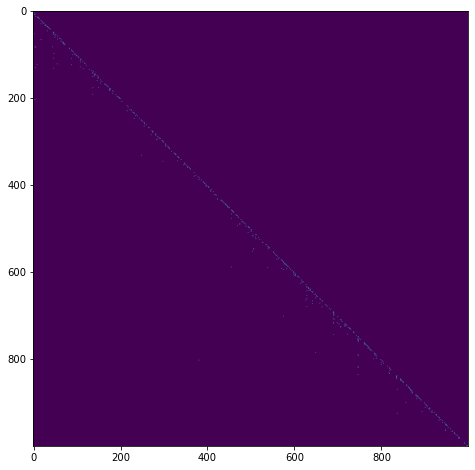

In [22]:
plt.figure(figsize=(8, 8))
plt.imshow(adj);

In [23]:
def join_text(texts):
    if isinstance(texts, str):
        return texts
    return ''.join(p if isinstance(p, str) else p['text'] for p in texts)

In [24]:
def to_bag(text, n=4):
    text = text.lower()
    return {text[i:i+n] for i in range(len(text)-n)}

def jaccard(bag1, bag2):
    return len(bag1.intersection(bag2)) / max(1, len(bag1.union(bag2)))

In [25]:
tail['joined'] = tail.text.apply(join_text) 
tail['bag'] = tail.joined.apply(to_bag)

In [26]:
from collections import Counter
word_freqs = Counter()
for b in tail.bag:
    word_freqs.update(b)

In [27]:
def weighted_jaccard(bag1, bag2, counts, alpha=1.0):
    w2w = {w: 1 / (counts.get(w, 0) + alpha) for w in bag1.union(bag2)}
    num = sum(w2w[w] for w in bag1.intersection(bag2))
    return num / max(1e-8, sum(w2w.values()))

In [28]:
from tqdm.auto import tqdm, trange
import numpy as np

/home/ivan/miniconda3/envs/chat-segmentation/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
jaccards = np.array([[jaccard(b1, b2) for b2 in tail.bag] for b1 in tqdm(tail.bag) ])

100%|█████████████████████████████| 1000/1000 [00:04<00:00, 224.99it/s]


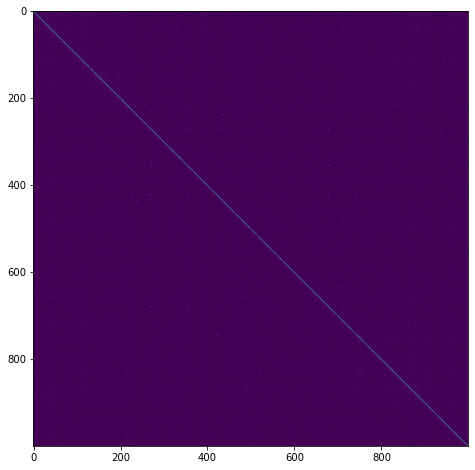

In [30]:
plt.figure(figsize=(8, 8))
plt.imshow(jaccards)

In [31]:
import random

def sample_negative(idx, index, max_diff=100, mm=None):
    if mm is None:
        mm = min(index)
    if idx <= mm:
        return None
    r = None
    while r is None or r not in index:
        r = random.randint(max(0, idx-max_diff), idx-1)
    return r

In [32]:
pairs = []
mm = tail.index.min()
for i, j in tail.reply_to_message_id.items():
    if pd.notna(j) and j in tail.index:
        pairs.append([i, int(j), 1])
    neg = sample_negative(i, tail.index, mm=mm)
    if neg is not None:
        pairs.append([i, neg, 0])
print(len(pairs))

1568


In [102]:
iy.groupby(['ii', 'jj']).count().reset_index().query('y > 1').head(100)

ii     jj  y
0     34020  34019  2
2     34022  34021  2
7     34026  34021  2
51    34053  34050  2
213   34152  34135  2
267   34188  34186  2
1001  34803  34798  2
1088  34880  34878  2
1153  34926  34905  2
1393  35105  35103  2
1419  35123  35121  2

In [33]:
iy = pd.DataFrame(pairs, columns=['ii', 'jj', 'y'])
print(iy.y.mean())

0.36288265306122447


In [34]:
iy.loc[0]

ii    34020
jj    34019
y         1
Name: 0, dtype: int64

In [93]:
iy.to_csv('./data/david_out.csv', index=False)

In [35]:
tail.sample(3)

type                 date edited                   from  \
id                                                                  
35012  message  2021-05-24T12:04:50    NaN     Vladislav Samsonov   
34329  message  2021-05-03T11:49:02    NaN                  Арман   
35186  message  2021-05-28T00:36:06    NaN  Anastasia Gaydashenko   

             from_id                                               text  \
id                                                                        
35012  user157749347  [Мне кажется , {'type': 'mention', 'text': '@I...   
34329  user204651015  вчера пытались с подругой найти штрудель с мор...   
35186  user175307798  Мы только сегодня вернулись в Москву, пошли уж...   

       reply_to_message_id         forwarded_from photo   width  ...  \
id                                                               ...   
35012              35011.0                    NaN   NaN     NaN  ...   
34329                  NaN                    NaN   NaN     NaN  ...   
35186                  NaN  Anastasia Gaydashenko   NaN  1072.0  ...   

                                                    file  \
id                                                         
35012                                                NaN   
34329                                                NaN   
35186  (File not included. Change data exporting sett...   

                                               thumbnail  mime_type  \
id                                                                    
35012                                                NaN        NaN   
34329                                                NaN        NaN   
35186  (File not included. Change data exporting sett...  video/mp4   

       media_type performer title duration_seconds                time  \
id                                                                       
35012         NaN       NaN   NaN              NaN 2021-05-24 12:04:50   
34329         NaN       NaN   NaN              NaN 2021-05-03 11:49:02   
35186  video_file       NaN   NaN              6.0 2021-05-28 00:36:06   

                                                  joined  \
id                                                         
35012  Мне кажется @InnovationScience живёт в каком-т...   
34329  вчера пытались с подругой найти штрудель с мор...   
35186  Мы только сегодня вернулись в Москву, пошли уж...   

                                                     bag  
id                                                        
35012  {севе, nova, @inn, арал,  в к, cien, ом ч, аже...  
34329  { мор, вчер, жно , алис,  с м, ись , . \n\n, п...  
35186  {пчик, сь в, и ту, ерну, т су, ать , рнул, ись...  

[3 rows x 22 columns]

In [36]:
import torch
from transformers import AutoTokenizer, AutoModel
bert_name = 'cointegrated/rubert-tiny'
tokenizer = AutoTokenizer.from_pretrained(bert_name)
bert = AutoModel.from_pretrained(bert_name)

Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [37]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings ** 2 * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum([1]), min=1e-9)
    sums = sum_embeddings / sum_mask
    return sums

def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, max_length=64, return_tensors='pt')
    
    with torch.no_grad():
        model_output = model(**t)

    # embeddings = model_output.pooler_output  # do not use pooler because it has one unused layer
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].numpy()

In [38]:
tail['bert'] = [embed_bert_cls(t, bert, tokenizer) for t in tqdm(tail.joined)]

100%|█████████████████████████████| 1000/1000 [00:02<00:00, 435.78it/s]


In [39]:
def extract_features(ii, jj, data):
    r1 = data.loc[ii]
    r2 = data.loc[jj]
    same2 = 0
    rr = r2.reply_to_message_id
    if pd.notna(rr) and rr in data.index and data.loc[rr].from_id == r1.from_id:
        same2 = 1
    return {
        'id_diff': ii-jj, 
        'time_diff': (r1.time - r2.time).total_seconds() / 3600,
        'ngram_jaccard': jaccard(r1.bag, r2.bag),
        'weighted_jaccard': weighted_jaccard(r1.bag, r2.bag, word_freqs),
        'same_author': int(r1.from_id == r2.from_id),
        'same_author2': same2,
        'bert_cos': sum(r1.bert * r2.bert),
    }

In [40]:
%%time

fe = pd.DataFrame(extract_features(row.ii, row.jj, data=tail) for i, row in iy.iterrows())
print(fe.shape)
fe.sample(3)

(1568, 7)
CPU times: user 586 ms, sys: 6 µs, total: 586 ms
Wall time: 587 ms


id_diff  time_diff  ngram_jaccard  weighted_jaccard  same_author  \
426       85  95.018333       0.000000          0.000000            0   
627       64  43.836389       0.000000          0.000000            0   
723       37  44.203889       0.023952          0.003558            0   

     same_author2  bert_cos  
426             0  0.342297  
627             0  0.566180  
723             0  0.804776

In [41]:
fe.describe()

id_diff    time_diff  ngram_jaccard  weighted_jaccard  same_author  \
count  1568.000000  1568.000000    1568.000000       1568.000000  1568.000000   
mean     34.105230    18.930047       0.012415          0.005885     0.045918   
std      34.702176    29.425489       0.027313          0.020057     0.209375   
min       1.000000     0.001389       0.000000          0.000000     0.000000   
25%       3.000000     0.101389       0.000000          0.000000     0.000000   
50%      23.500000     2.035000       0.000000          0.000000     0.000000   
75%      60.000000    29.386736       0.013889          0.002370     0.000000   
max     512.000000   281.411111       0.423729          0.274553     1.000000   

       same_author2     bert_cos  
count   1568.000000  1568.000000  
mean       0.137117     0.500726  
std        0.344081     0.164458  
min        0.000000    -0.002358  
25%        0.000000     0.388029  
50%        0.000000     0.511493  
75%        0.000000     0.623783  
max        1.000000     1.000000

In [42]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
cv = KFold(n_splits=3, random_state=1, shuffle=True)

In [43]:
fe.shape, iy.shape

((1568, 7), (1568, 3))

In [44]:
cross_val_score(LogisticRegression(), fe, iy.y, cv=cv, scoring='roc_auc')

array([0.90788265, 0.91507512, 0.92650834])

In [45]:
cross_val_score(GradientBoostingClassifier(), fe, iy.y, cv=cv, scoring='roc_auc')

array([0.94338308, 0.93048128, 0.94630455])

In [46]:
def feature_exclusion(model, X, y, cv):
    base_score = cross_val_score(model, X, y, cv=cv, scoring='roc_auc').mean()
    print(base_score)
    for column in X.columns:
        new_score = cross_val_score(model, X.drop(column, axis=1), y, cv=cv, scoring='roc_auc').mean()
        print(f'{column:20}  {base_score-new_score: 4.4f}')

In [47]:
feature_exclusion(GradientBoostingClassifier(n_estimators=30), fe, iy.y, cv=cv)

0.9413699406498166
id_diff                0.0338
time_diff              0.0081
ngram_jaccard          0.0005
weighted_jaccard      -0.0003
same_author            0.0013
same_author2           0.0028
bert_cos               0.0002


In [48]:
feature_exclusion(LogisticRegression(), fe, iy.y, cv=cv)

0.916488702445908
id_diff                0.0351
time_diff              0.0040
ngram_jaccard          0.0005
weighted_jaccard       0.0003
same_author            0.0024
same_author2           0.0007
bert_cos              -0.0027


In [49]:
pd.Series(LogisticRegression().fit(fe, iy.y).coef_[0], index=fe.columns)

id_diff            -0.045127
time_diff          -0.034157
ngram_jaccard       1.500218
weighted_jaccard    1.211422
same_author        -0.958815
same_author2        1.608584
bert_cos            1.326637
dtype: float64

In [50]:
model = GradientBoostingClassifier().fit(fe, iy.y)

In [51]:
pd.Series(model.feature_importances_, index=fe.columns)

id_diff             0.766067
time_diff           0.080000
ngram_jaccard       0.015729
weighted_jaccard    0.072952
same_author         0.012962
same_author2        0.018379
bert_cos            0.033910
dtype: float64

In [52]:
pairs2 = []
si = set(tail.index)
for i in tail.index:
    for j in range(i-100, i-1):
        if j in si:
            pairs2.append([i, j])
print(len(pairs2))

fe2 = pd.DataFrame(extract_features(*p, data=tail) for p in tqdm(pairs2))

78270


100%|██████████████████████████| 78270/78270 [00:26<00:00, 2955.21it/s]


In [ ]:
pairs2[0

[[34021, 34019],
 [34022, 34019],
 [34022, 34020],
 [34023, 34019],
 [34023, 34020],
 [34023, 34021],
 [34024, 34019],
 [34024, 34020],
 [34024, 34021],
 [34024, 34022],
 [34025, 34019],
 [34025, 34020],
 [34025, 34021],
 [34025, 34022],
 [34025, 34023],
 [34026, 34019],
 [34026, 34020],
 [34026, 34021],
 [34026, 34022],
 [34026, 34023],
 [34026, 34024],
 [34027, 34019],
 [34027, 34020],
 [34027, 34021],
 [34027, 34022],
 [34027, 34023],
 [34027, 34024],
 [34027, 34025],
 [34028, 34019],
 [34028, 34020],
 [34028, 34021],
 [34028, 34022],
 [34028, 34023],
 [34028, 34024],
 [34028, 34025],
 [34028, 34026],
 [34029, 34019],
 [34029, 34020],
 [34029, 34021],
 [34029, 34022],
 [34029, 34023],
 [34029, 34024],
 [34029, 34025],
 [34029, 34026],
 [34029, 34027],
 [34030, 34019],
 [34030, 34020],
 [34030, 34021],
 [34030, 34022],
 [34030, 34023],
 [34030, 34024],
 [34030, 34025],
 [34030, 34026],
 [34030, 34027],
 [34030, 34028],
 [34031, 34019],
 [34031, 34020],
 [34031, 34021],
 [34031, 34022

In [64]:
fe2.head()

id_diff  time_diff  ngram_jaccard  weighted_jaccard  same_author  \
0        2   0.012778       0.015228          0.007060            0   
1        3   0.036389       0.000000          0.000000            0   
2        2   0.032778       0.004651          0.000704            0   
3        4   0.045833       0.000000          0.000000            0   
4        3   0.042222       0.000000          0.000000            0   

   same_author2  bert_cos  
0             0  0.626285  
1             0  0.559479  
2             0  0.399754  
3             0  0.527095  
4             0  0.492736

In [75]:
fe.shape, iy.shape

((1568, 7), (1568, 3))

In [77]:
fe

id_diff  time_diff  ngram_jaccard  weighted_jaccard  same_author  \
0           1   0.003611       0.000000          0.000000            0   
1           1   0.003611       0.000000          0.000000            0   
2           2   0.012778       0.015228          0.007060            0   
3           1   0.023611       0.020349          0.002445            0   
4           1   0.023611       0.020349          0.002445            0   
...       ...        ...            ...               ...          ...   
1563       39  45.824167       0.000000          0.000000            0   
1564        5   0.656944       0.000000          0.000000            0   
1565       45  51.611944       0.000000          0.000000            0   
1566        1   0.013889       0.019048          0.001083            0   
1567       47  51.700000       0.008403          0.000792            0   

      same_author2  bert_cos  
0                0  0.421614  
1                0  0.421614  
2                0  0.626285  
3                0  0.708656  
4                0  0.708656  
...            ...       ...  
1563             0  0.218816  
1564             0  0.324700  
1565             0  0.542712  
1566             1  0.666417  
1567             0  0.580973  

[1568 rows x 7 columns]

In [67]:
dict(zip(fe2.columns, model.feature_importances_))

{'id_diff': 0.7660673149980655,
 'time_diff': 0.0800002860159114,
 'ngram_jaccard': 0.015729245791016793,
 'weighted_jaccard': 0.07295187935251284,
 'same_author': 0.012962147415552534,
 'same_author2': 0.018379246344701363,
 'bert_cos': 0.0339098800822397}

In [106]:
pd.Series(model.predict_proba(fe)[:, 1]).describe()

count    1568.000000
mean        0.362877
std         0.389614
min         0.006383
25%         0.018380
50%         0.124314
75%         0.836460
max         0.988092
dtype: float64

In [53]:
scores = model.predict_proba(fe2)[:, 1]
print(scores.mean())

0.11320270883014888


In [54]:
import scipy.sparse

In [55]:
id2row = {id:rownum for rownum, id in enumerate(tail.index)}

In [56]:
tp = tail.reply_to_message_id.dropna()
tp = tp[tp.apply(lambda x: x in id2row)]

In [57]:
adj = scipy.sparse.coo_matrix(
    (tp * 0 + 1, ([id2row[i] for i in tp.index], [id2row[j] for j in tp])), 
    shape=(len(id2row), len(id2row))
)

In [69]:
diff = [a - b for a, b in pairs2]

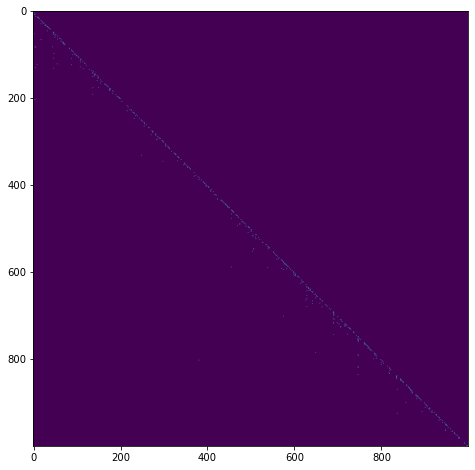

In [58]:
plt.figure(figsize=(8, 8))
plt.imshow(adj.todense());

In [103]:
adj.todense().shape

(1000, 1000)

In [88]:
pd.Series(scores).describe()
# count    1566.000000
# mean        0.405180
# std         0.361999
# min         0.038613
# 25%         0.057280
# 50%         0.236347
# 75%         0.837691
# max         0.984325

count    78270.000000
mean         0.113203
std          0.188236
min          0.002119
25%          0.013377
50%          0.026053
75%          0.114064
max          0.988132
dtype: float64

In [109]:
len(pairs2)

78270

In [110]:
len(id2row)

1000

In [59]:
adj2 = scipy.sparse.coo_matrix(
    (scores, ([id2row[i] for i, j in pairs2], [id2row[j] for i, j in pairs2])), 
    shape=(len(id2row), len(id2row))
)
adj2.shape

(1000, 1000)

In [86]:
adj2.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.86023631, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.62604374, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.50714843, 0.        ,
         0.        ]])

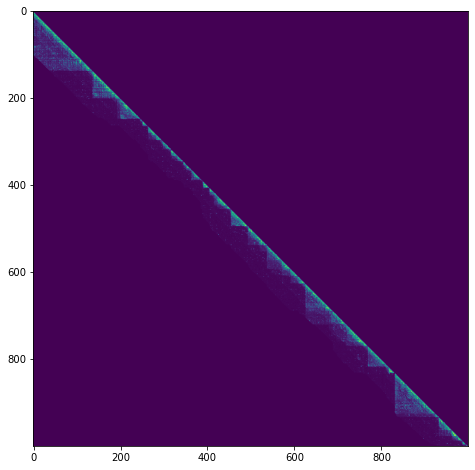

In [89]:
plt.figure(figsize=(8, 8))
plt.imshow(adj2.todense());

In [884]:
links = adj + adj2
sims = links + links.T
sims

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 156918 stored elements in Compressed Sparse Row format>

In [826]:
from sklearn.cluster import AgglomerativeClustering

In [885]:
agg = AgglomerativeClustering(
    linkage='average', distance_threshold=0.95, n_clusters=None, affinity='precomputed'
)

In [886]:
agg.fit(1 - np.minimum(sims.todense(), 1))
print(agg.n_clusters_)

22


In [887]:
tail['cluster'] = agg.labels_
tail['centrality'] = np.array(sims.sum(axis=1))[:, 0]

In [888]:
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 1000

In [890]:
import community as community_louvain # python-louvain
import networkx as nx

In [891]:
G = nx.Graph()
cx = scipy.sparse.coo_matrix(sims)
for i, j, v in zip(cx.row, cx.col, cx.data):
    G.add_edge(i, j, weight=v)

In [892]:
bp = community_louvain.best_partition(G, resolution=0.3)
len(set(bp.values()))

17

In [893]:
tail['cl2'] = [bp[i] for i in range(tail.shape[0])]

In [907]:
existing = set()
borders = []
for i, c in enumerate(tail.cl2):
    if c not in existing:
        borders.append(i)
        existing.add(c)
print(len(borders))

17


In [908]:
tail.cluster.nunique()

22

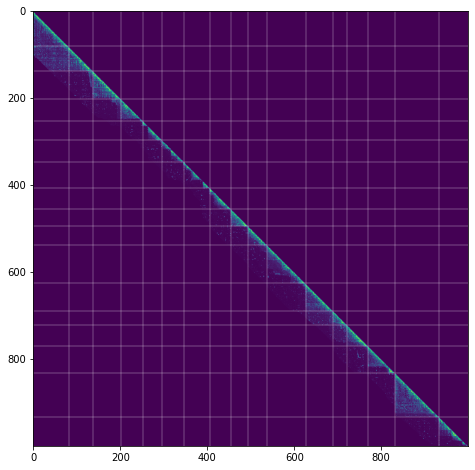

In [910]:
plt.figure(figsize=(8, 8))
plt.imshow(adj2.todense());
plt.vlines(borders, *plt.ylim(), linewidth=0.3, color='white')
plt.hlines(borders, *plt.xlim(), linewidth=0.3, color='white');

In [849]:
def shorten(text, max_len=100, min_len=40):
    parts = text.split('\n')
    result = ''
    for p in parts:
        if len(result) < min_len or len(result) + len(p) <= max_len:
            result += ' ' + p
    return result

In [533]:
def find_source(part):
    id = part.centrality.idxmax()
    rep = part.reply_to_message_id[id]
    while pd.notna(rep) and rep in part.index:
        id = rep
        rep = part.reply_to_message_id[rep]
    text = part.joined[id]
    return shorten(text)

In [624]:
def get_page_rank(part_graph, alpha=0.01):
    w = part_graph + np.ones_like(part_graph) / part_graph.shape[0] * alpha
    w = (w / w.sum(axis=1)).T  # each row
    ranks = np.asarray(np.abs(np.linalg.eig(w)[1][:, 0].real)).ravel()
    return ranks

In [628]:
def get_part_head(part):
    part_indices = [id2row[p] for p in part.index]
    part_graph = links[:, part_indices][part_indices, :].todense()
    ranks = get_page_rank(part_graph)
    text = part.joined.iloc[ranks.argmax()]
    return shorten(text)

In [862]:
def normalize(x):
    return x / max(1e-10, sum(x**2)**0.5)

def get_part_center(part):
    m = np.stack(part.bert)
    c = normalize(m.mean(axis=0))
    scores = np.dot(m, c)
    return shorten(part.joined.iloc[scores.argmax()])

In [842]:
for cluster_id, part in tail.groupby('cluster'):
    summary = get_part_head(part)
    print(cluster_id, '\t', part.shape[0], '\t', summary)

0 	 29 	  Ребят, всем добрейшего вечерочка 
1 	 134 	  Это там где за такси начисляют и снимают 10%?
2 	 23 	  а ещё я квартирник организовываю😄 приходите)
3 	 62 	  Какие хорошие бары есть в районе Павелецкой?
4 	 22 	  всем привет! может кому пригодится новая икеевская кровать в собранном (или частично разобранном) виде? 140х200, даром, можно забрать с м. Парк Культуры завтра/послезавтра
5 	 3 	  Рассказали, что тут такое любят. Если захотите завтра послушать Гутова, пишите Наташе имя и фамилию (если не получается написать Наташе, то можно написать мне, и я форвардну)
6 	 94 	  Привет!🌤 Туса в колливе на Парке 29мая с 18часов. Ссылочки в этот раз не будет. Заявочки принимаются до 12:00 чт. Для этого напишите мне с хештегом #api .
7 	 40 	  И к психологу заодно!
8 	 46 	  Капец какую дискуссию пропустил...
9 	 31 	  Кто-нибудь идёт сегодня на ночь музеев? (https://t.me/t_chemodan/2363)
10 	 34 	  А есть у кого контакты проверенного репетитора по сальфеджио? :)
11 	 68 	  Ну да, не пол

In [863]:
for cluster_id, part in tail.groupby('cl2'):
    # summary = gensim.summarization.summarize('\n\n'.join(part.joined), word_count=30)
    # summary = part.joined.iloc[0].split('\n')[0]
    # summary = part.joined[part.centrality.idxmax()]
    print(cluster_id, '\t', part.shape[0])
    print(get_part_head(part))
    print(get_part_center(part))

0 	 18
 Это там где за такси начисляют и снимают 10%?
 Я про личный опыт То, что меня интересует, там мало, в КиноПоиске больше
1 	 11
 1. Яндекс.еда — постоянно не работает всё что может не работать.          
 Да скажи что-нибудь лучше, хейтер!)
2 	 14
 Да лучше то что))))
 А ты же знаешь, что Uber Eats == Яндекс.Еда?
3 	 15
 Всякое бывает
 Как-то не по-русски даже) Интересно
4 	 5
 А я не говорю, что сервисы лучше доступны в Мск.
 А я не говорю, что сервисы лучше доступны в Мск.
5 	 21
 Погода сухая, я пошёл кататься(
 вроде бы календарь снсобытий существует..
6 	 9
 Так что это не проблема Яндекса, а в целом почтовых клиентов
 Но да, репутация держится за счёт тех, кто сталкивается с продуктами Яндекса редко
7 	 28
 У меня дома отключили воду! Набросайте идей, где можно комфортно сходить в душ (а еще лучше в джакузи) ?
 в котором есть зал... не быть же потным после тренировки
8 	 14
 Можно им заплатить и рекламы не будет. Разумная альтернатива?
 Не хочу сриншотить свою почту, но не

In [844]:
tail[tail.cl2 == 7][['joined', 'centrality']].reset_index(drop=True).plot()

<AxesSubplot:>

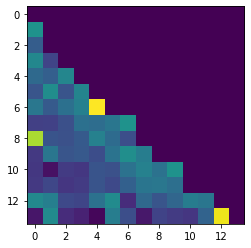

In [845]:
part = tail[tail.cl2==8]
part_indices = [id2row[p] for p in part.index]
part_graph = links[:, part_indices][part_indices, :].todense()
ranks = get_page_rank(part_graph)
plt.imshow(part_graph)

In [846]:
_ = pd.DataFrame(part[['reply_to_message_id', 'joined']])
_['rank'] = ranks
_

reply_to_message_id  \
id                           
34075              34069.0   
34076              34075.0   
34077                  NaN   
34078                  NaN   
34079              34069.0   
34080                  NaN   
34081              34079.0   
34082              34081.0   
34083              34075.0   
34084              34037.0   
34085              34084.0   
34086                  NaN   
34088                  NaN   
34091              34088.0   

                                                                                                    joined  \
id                                                                                                           
34075                                        Можно им заплатить и рекламы не будет. Разумная альтернатива?   
34076                                           Неразумная, у них даже в подписке без рекламы есть реклама   
34077                                                                                           Я заплатил   
34078                                                                        Уже статей пять читал об этом   
34079                                               Всегда только сверху было, никогда не видел в середине   
34080                                                   Не хочу сриншотить свою почту, но не вижу рекламы.   
34081                                                                      в браузером клиенте на десктопе   
34082                                                                   Там тоже только сверху у меня было   
34083                                                                              я плачу Яндексу за плюс   
34084  привет! а подскажи, откуда эта статья в последней ссылке? заинтересовал контент, гугл не находит...   
34085                                                             Статья которая про ебучие индекс пейджи?   
34086                                                                                                   да   
34088                  мне им за почту платить ещё? \n\nя плачу микрософьу за офис и не вижу рекламы нигде   
34091                               У них подписка на почту отдельная\nНе знаю почему не сделали нормально   

           rank  
id               
34075  0.848478  
34076  0.281515  
34077  0.224672  
34078  0.178965  
34079  0.178216  
34080  0.135226  
34081  0.136644  
34082  0.106829  
34083  0.091318  
34084  0.094637  
34085  0.072445  
34086  0.074895  
34088  0.079245  
34091  0.061362

In [847]:
tail[['cl2', 'joined']]

cl2  \
id           
34019    0   
34020    0   
34021    0   
34022    0   
34023    0   
34024    0   
34025    0   
34026    0   
34027    0   
34028    0   
34029    0   
34030    0   
34031    0   
34032    0   
34033    0   
34034    0   
34035    0   
34036    0   
34037    1   
34038    1   
34039    1   
34040    1   
34041    1   
34042    1   
34043    1   
34044    1   
34045    1   
34046    2   
34047    1   
34048    1   
34049    2   
34050    2   
34051    6   
34052    2   
34053    2   
34054    2   
34055    2   
34056    2   
34057    2   
34058    2   
34059    2   
34060    2   
34061    4   
34062    2   
34063    2   
34064    6   
34065    6   
34066    4   
34067    6   
34068    4   
34069    6   
34070    6   
34071    4   
34072    6   
34073    4   
34074    6   
34075    8   
34076    8   
34077    8   
34078    8   
34079    8   
34080    8   
34081    8   
34082    8   
34083    8   
34084    8   
34085    8   
34086    8   
34087   11   
34088    8   
34089   11   
34090   11   
34091    8   
34092   11   
34093   11   
34094   11   
34095   11   
34096   11   
34097   11   
34098   11   
34099   11   
34100   13   
34101   11   
34102   13   
34103   14   
34104   13   
34105   13   
34106   14   
34107   15   
34108   14   
34109   14   
34110   14   
34111   14   
34112   14   
34113   14   
34114   14   
34115   14   
34116    6   
34117   14   
34118   19   
34119   14   
34120   19   
34121   14   
34122   19   
34123   19   
34124   19   
34125   19   
34126   19   
34128   22   
34129   15   
34130   22   
34131   22   
34132   22   
34133   22   
34134   22   
34135   22   
34136   22   
34137   15   
34138   15   
34139   15   
34140   21   
34141   15   
34142   21   
34143   15   
34144   21   
34145   21   
34146   21   
34147   21   
34148   21   
34149   21   
34150   21   
34151   21   
34152   22   
34153   21   
34154   21   
34155   21   
34156   21   
34157   23   
34158   23   
34159   23   
34160   23   
34161   23   
34162   23   
34163   23   
34164   23   
34165   23   
34166   23   
34167   23   
34168   23   
34169   23   
34170   23   
34171   23   
34172   23   
34173   23   
34174   24   
34175   23   
34176   24   
34177   24   
34178   24   
34179   24   
34180   24   
34181   24   
34182   24   
34184   24   
34185   24   
34186   24   
34187   25   
34188   24   
34189   25   
34190   25   
34191   25   
34192   25   
34193   25   
34194   25   
34195   25   
34196   25   
34197   25   
34198   25   
34199   25   
34200   25   
34201   25   
34202   25   
34203   25   
34204   25   
34205   25   
34206   25   
34207   26   
34208   25   
34209   26   
34210   26   
34211   26   
34212   26   
34213   26   
34214   26   
34215   26   
34216   26   
34217   26   
34218   26   
34219   26   
34220   26   
34221   26   
34222   27   
34223   27   
34224   27   
34225   27   
34226   27   
34227   27   
34228   27   
34229   27   
34230   27   
34231   27   
34232   27   
34233   27   
34234   27   
34235   27   
34236   27   
34238   27   
34239   27   
34240   27   
34241   27   
34242   27   
34243   27   
34244   27   
34245   27   
34246   27   
34247   27   
34248   27   
34249   27   
34250   27   
34251   27   
34252   27   
34253   27   
34254   27   
34255   27   
34256   27   
34257   27   
34258   27   
34259   27   
34260   27   
34261   27   
34264   27   
34265   27   
34266   27   
34267   27   
34268   27   
34269   27   
34279   27   
34280   27   
34281   28   
34282   28   
34283   28   
34284   28   
34289   28   
34290   28   
34291   28   
34292   28   
34293   28   
34294   28   
34295   28   
34296   28   
34297   28   
34298   28   
34299   28   
34300   28   
34319   31   
34320   31   
34321   31   
34322   31   
34323   31   
34325   31   
34326   31   
34327   31   
34328   31   
34329   31   
34330   31   
34331   31   
34332   31   
34333   31   
34334   31   
34335   31   
34336   31   
34337   31   
34338   31   
34339   31   
343